# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# setting path

path = r'/Users/brad/Desktop/Instacart Basket Analysis'

In [4]:
# Importing the orders_products_merged_updated pkl file

ords_prods_merge = pd.read_pickle(os.path.join(path, '/Users/brad/Desktop/Instacart Basket Analysis/02 Data/Prepared Data/orders_products_merged_updated.pkl'))
print(path)

/Users/brad/Desktop/Instacart Basket Analysis


In [5]:
# Defining df
df = ords_prods_merge

# Creating bar charts

<Axes: xlabel='orders_day_of_the_week'>

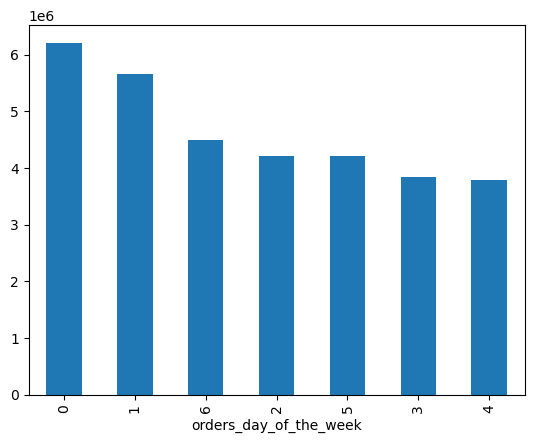

In [7]:
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

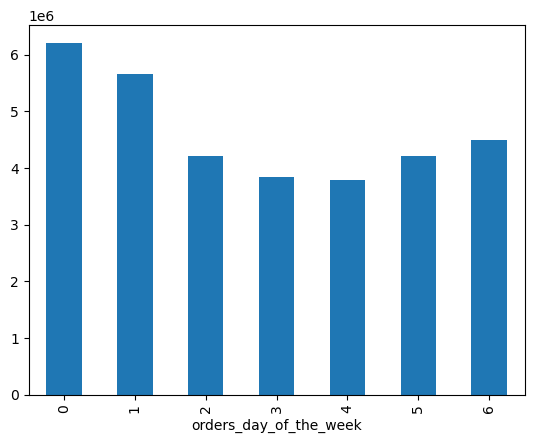

In [8]:
# sort according to days of week
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

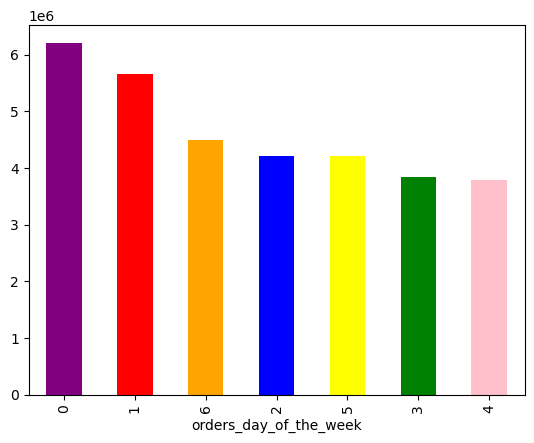

In [9]:
# Adding some color
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'orange', 'blue', 'yellow', 'green', 'pink'])

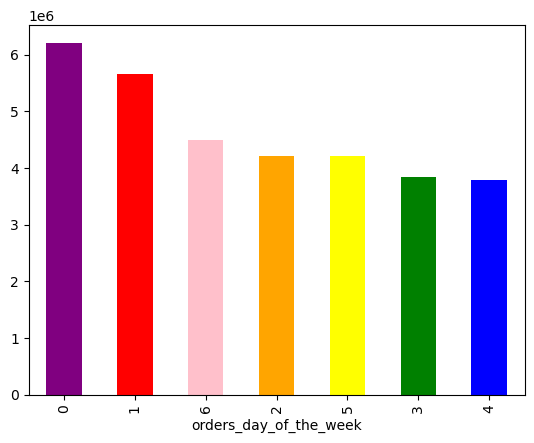

In [10]:
# Exporting the chart
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Exporting the bar as a image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

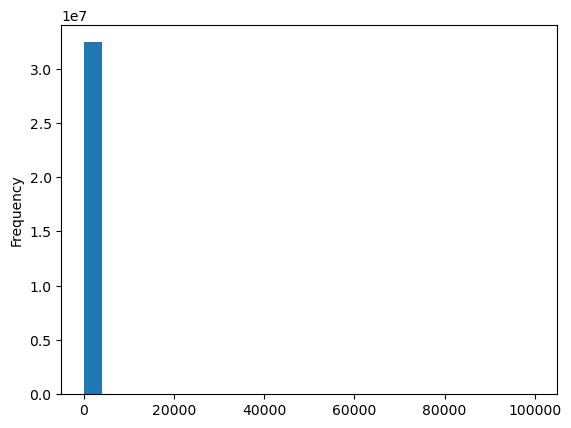

In [13]:
# Histograms
ords_prods_merge['prices'].plot.hist(bins = 25)

 - There is an extereme value (outlier) which is skewing the resulrs of the histogram

In [15]:
ords_prods_merge ['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

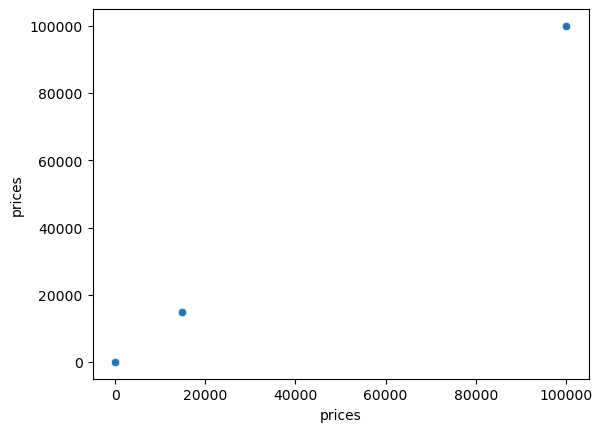

In [14]:
# Creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [16]:
# Creating a threshold price to eliminate outliers
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_orders,order_frequency_flag
10030345,171,171,912404,17,prior,12,2,14,5.0,21553,...,both,Regularly busy,Regularly days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,181,181,603376,17,prior,22,6,16,4.0,21553,...,both,Regularly busy,Regularly days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,1944,1944,3264360,135,prior,2,2,21,13.0,21553,...,both,Regularly busy,Regularly days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,1945,1945,892534,135,prior,3,0,8,12.0,21553,...,both,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,5708,5708,229704,342,prior,8,1,19,30.0,21553,...,both,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29193268,3386542,3386542,2249946,204099,prior,29,0,8,4.0,33664,...,both,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193269,3386544,3386544,2363282,204099,prior,31,0,9,2.0,33664,...,both,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29193270,3391313,3391313,3181945,204395,prior,13,3,15,8.0,33664,...,both,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29193271,3405096,3405096,2486215,205227,prior,7,3,20,4.0,33664,...,both,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


The above column represents outlier observations

In [17]:
# Mark outlies as missing values (NaN)
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [18]:
# check with replacement NaN was successful
ords_prods_merge['prices'].max()

25.0

# Histogram after cleaning

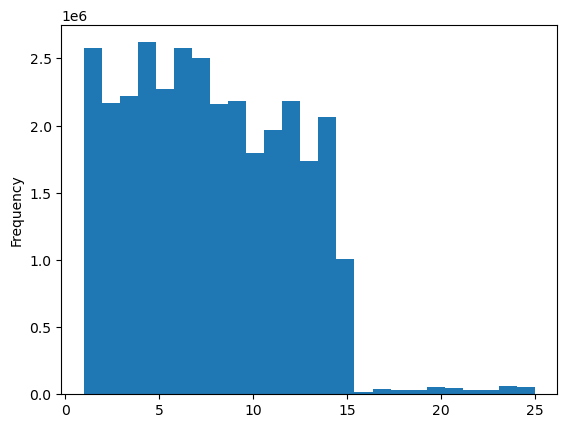

In [19]:
hist = ords_prods_merge['prices'].plot.hist(bins=25)

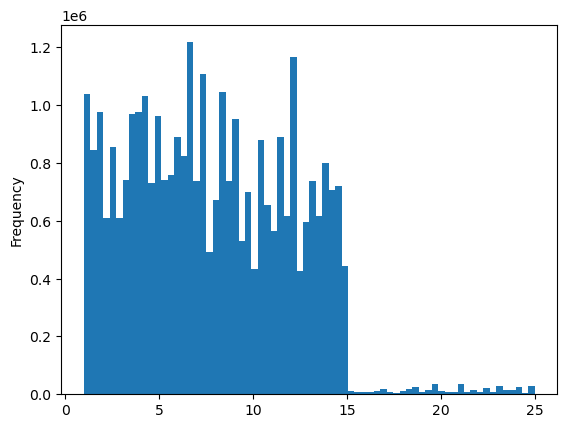

In [20]:
hist = ords_prods_merge['prices'].plot.hist(bins=70)

In [21]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_frequency.png'))

# Linecharts through Sampling Data

In [22]:
# Setting the seed
np.random.seed(4)
# Creating random numbers & code a logical test * store results in a new list (dev)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [23]:
dev

array([False,  True, False, ..., False,  True,  True])

In [24]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [26]:
# Splitting dataframe into two samples (70% of sample in dataframe big)
big = ords_prods_merge[dev]

In [29]:
# Splitting dataframe into two samples (30% of sample in dataframe small)
small = ords_prods_merge[~dev]

In [28]:
# Checking data rows are equal
len(ords_prods_merge)

32434212

In [30]:
len(big)+len(small)

32434212

In [31]:
# reducing samples to neccessary columns
df_2 = small[['orders_day_of_the_week','prices']]

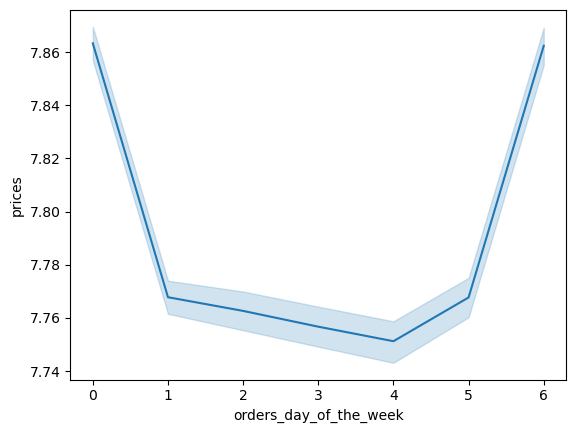

In [33]:
# Create the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week',y = 'prices')